# 01. Exploratory Data Analysis - application_train.csv

## 1. Data Loading & Shape

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'c:\\dev\\credit-risk-pd\\src\\notebooks'

In [72]:
df = pd.read_csv('../../data/raw/application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
print(df.info())
print(f"\ndimensions: \n{df.shape}\n")
print(f"class proportions: \n{df['TARGET'].value_counts(normalize=True)}\n")
print(f"dtypes: \n{df.dtypes.value_counts()}\n")

<class 'pandas.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), str(16)
memory usage: 286.2 MB
None

dimensions: 
(307511, 122)

class proportions: 
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

dtypes: 
float64    65
int64      41
str        16
Name: count, dtype: int64



In [109]:
df.duplicated().sum()

np.int64(0)

## 2. Target Distribution & Class Imbalance

In [6]:
target_rate = df['TARGET'].mean()
print("Default rate:", target_rate)

Default rate: 0.08072881945686496


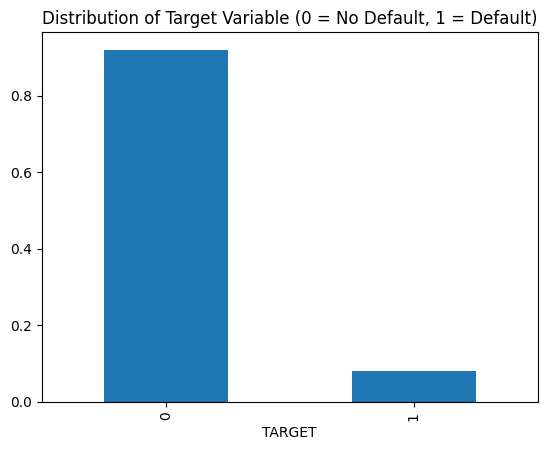

In [7]:
df['TARGET'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Target Variable (0 = No Default, 1 = Default)')
plt.show()

## 3. Missingness Analysis

In [8]:
missing = df.isnull().mean().sort_values(ascending=False)
print(f"total no. of features with missing values: {missing[missing > 0].count()}")
missing.head(30)

total no. of features with missing values: 67


COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
FLOORSMIN_MODE              0.678486
FLOORSMIN_AVG               0.678486
FLOORSMIN_MEDI              0.678486
YEARS_BUILD_AVG             0.664978
YEARS_BUILD_MODE            0.664978
YEARS_BUILD_MEDI            0.664978
OWN_CAR_AGE                 0.659908
LANDAREA_MEDI               0.593767
LANDAREA_AVG                0.593767
LANDAREA_MODE               0.593767
BASEMENTAREA_MODE           0.585160
BASEMENTAREA_MEDI           0.585160
BASEMENTAREA_AVG            0.585160
EXT_SOURCE_1                0.563811
NONLIVINGAREA_MODE          0.551792
NONLIVINGAREA_AVG           0.551792
NONLIVINGAREA_MEDI          0.551792
E

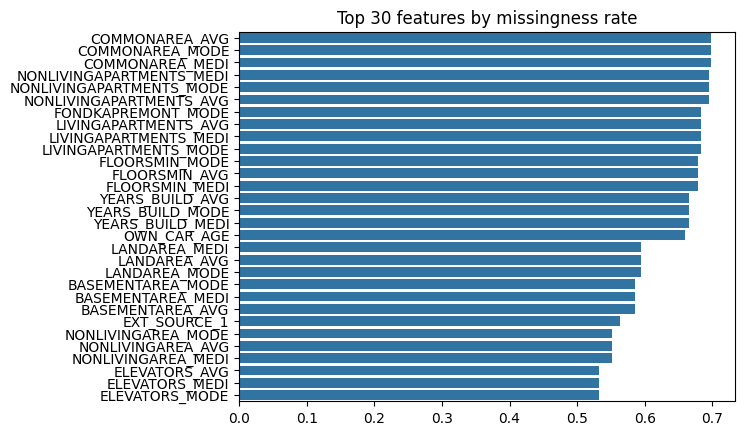

In [9]:
sns.barplot(data=missing.head(30), orient='h')
plt.title('Top 30 features by missingness rate')
plt.show()

In [10]:
for thresh in [0.1, 0.3, 0.5, 0.7]:
    print(thresh, (missing > thresh).sum())

0.1 57
0.3 50
0.5 41
0.7 0


EXT_SOURCE_1    0.563811
EXT_SOURCE_2    0.002146
EXT_SOURCE_3    0.198253
dtype: float64


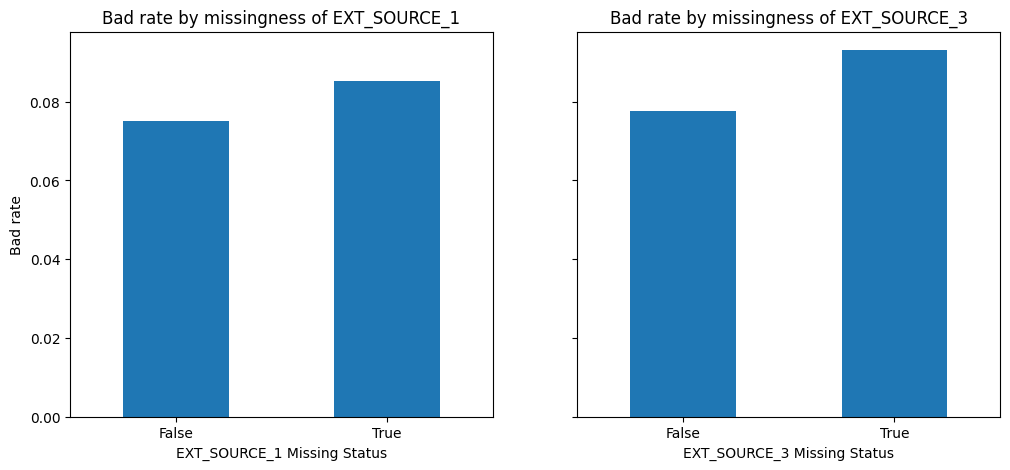

In [60]:
print(df[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3']].isnull().mean())

# Create figure and subplots (1 row, 2 columns))
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

miss_1 = df['EXT_SOURCE_1'].isnull()
ext_miss_1 = df.groupby(miss_1)['TARGET'].mean()
ext_miss_1.plot(kind='bar', ax=axes[0])
axes[0].set_title('Bad rate by missingness of EXT_SOURCE_1')
axes[0].set_xlabel('EXT_SOURCE_1 Missing Status')
axes[0].set_ylabel('Bad rate')
axes[0].tick_params(axis='x', rotation=0)


miss_3 = df['EXT_SOURCE_3'].isnull()
ext_miss_3 = df.groupby(miss_3)['TARGET'].mean()
ext_miss_3.plot(kind='bar', ax=axes[1])
axes[1].set_title('Bad rate by missingness of EXT_SOURCE_3')
axes[1].set_xlabel('EXT_SOURCE_3 Missing Status')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout
plt.show()


## 4. Numeric Feature distributions + Outliers

In [64]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove("TARGET")
len(num_cols)

106

In [14]:
df[num_cols].describe().T.sort_values("std", ascending=False).head(20)


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.0,-7479.5,-4504.0,-2010.0,0.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
DAYS_LAST_PHONE_CHANGE,307510.0,-962.858788,826.808487,-4292.0,-1570.0,-757.0,-274.0,0.0


In [78]:
len(df['CNT_CHILDREN'][df['CNT_CHILDREN'] == 0])
df['CNT_CHILDREN'].median()

np.float64(0.0)

In [106]:
anom = df['DAYS_EMPLOYED'] == 365243
df.loc[anom, 'DAYS_EMPLOYED'] = np.nan
df['DAYS_EMPLOYED_ANOM'] = anom.astype(int)

df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']) / 365.25
df['YEARS_BIRTH'] = abs(df['DAYS_BIRTH']) / 365.25

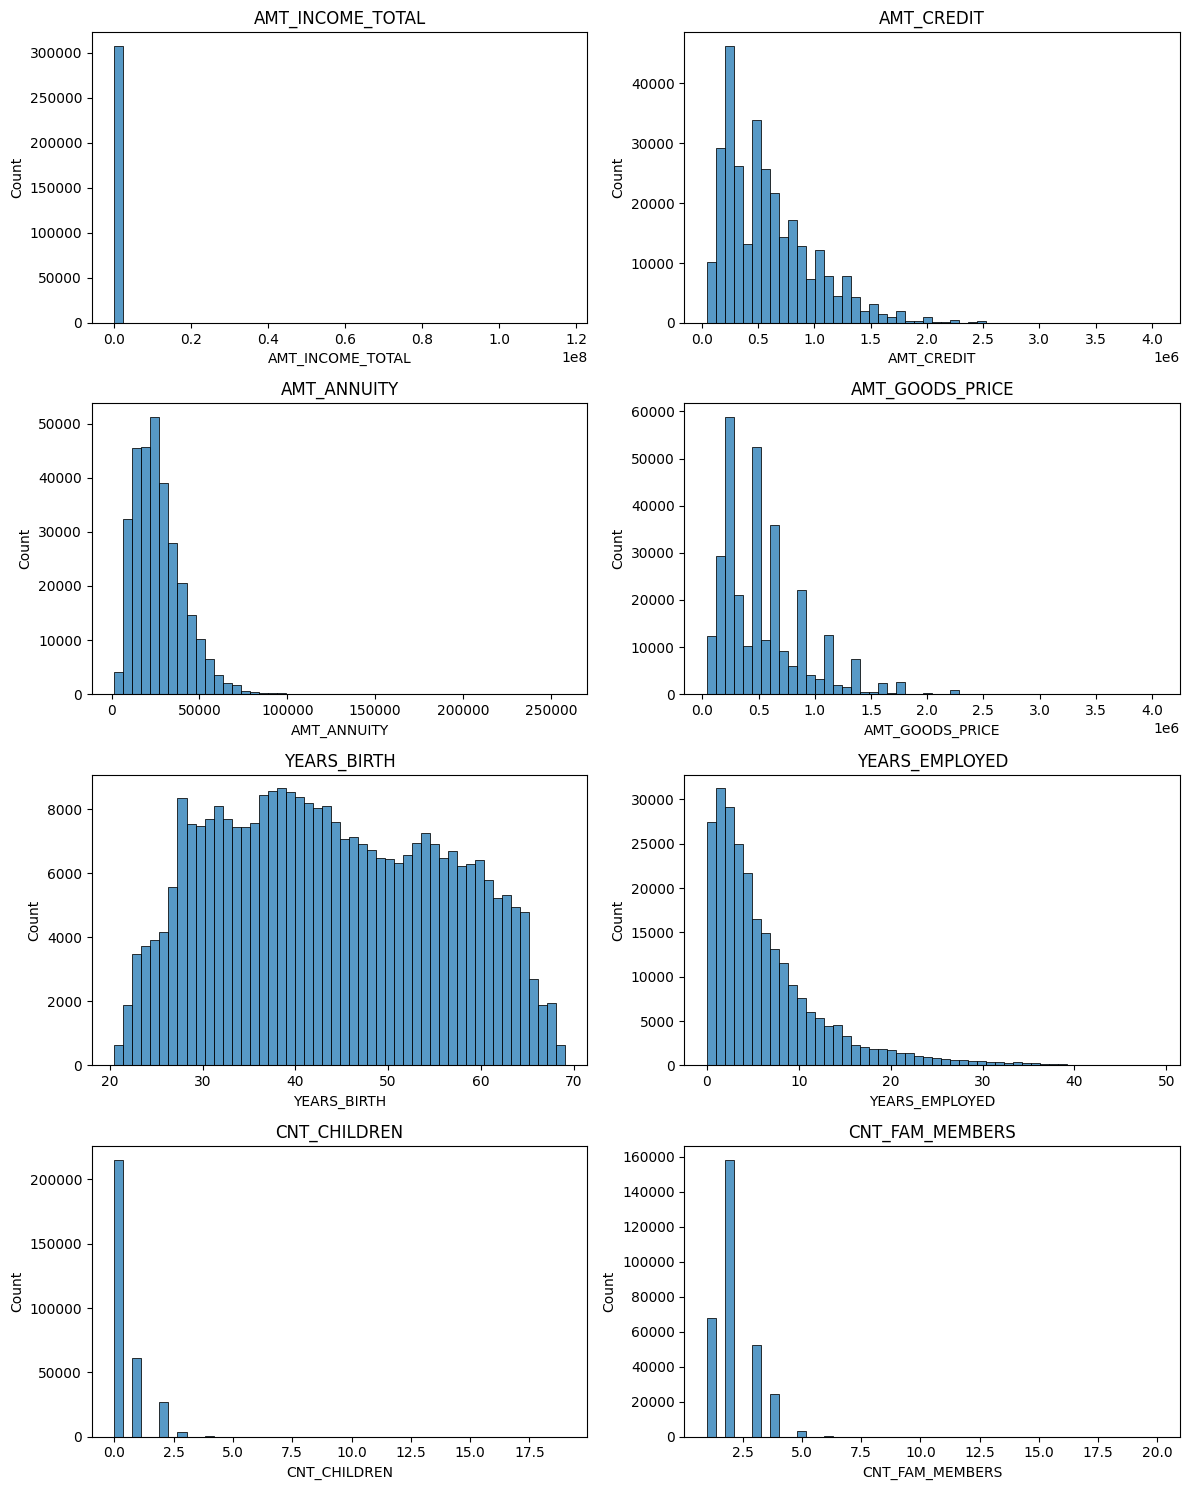

In [107]:
cols_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                'YEARS_BIRTH', 'YEARS_EMPLOYED', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']

fig, axes = plt.subplots(4, 2, figsize=(12, 15))
axes= axes.flatten()

for i, column in enumerate(cols_to_plot):
    sns.histplot(data=df, x=df[column], bins=50, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


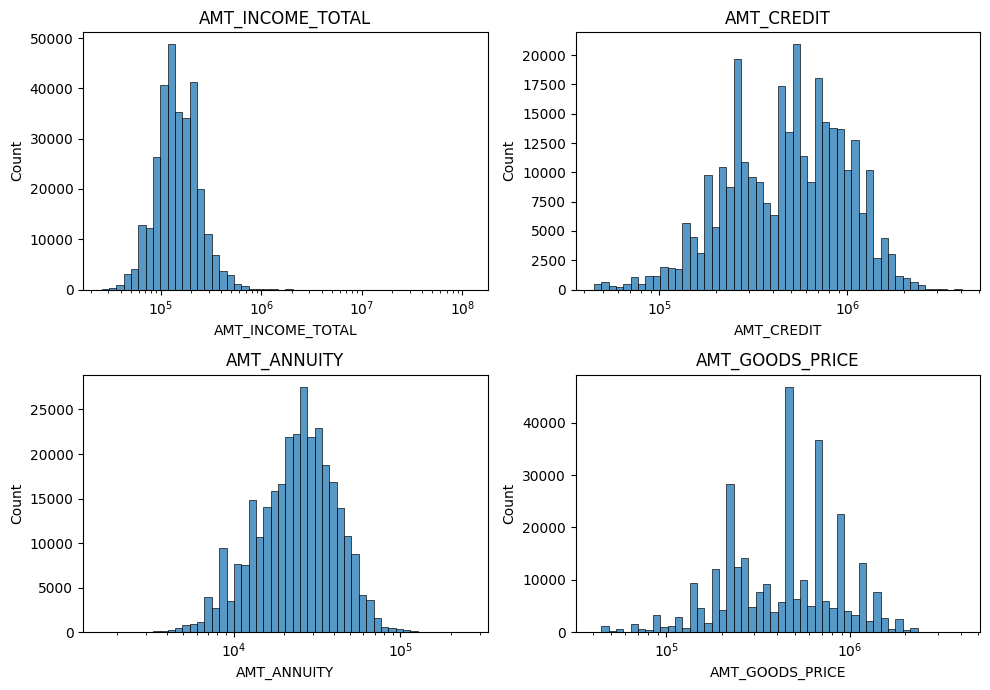

In [ ]:
cols_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes= axes.flatten()

for i, column in enumerate(cols_to_plot):
    sns.histplot(data=df, x=df[column], bins=50, ax=axes[i], log_scale=True)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


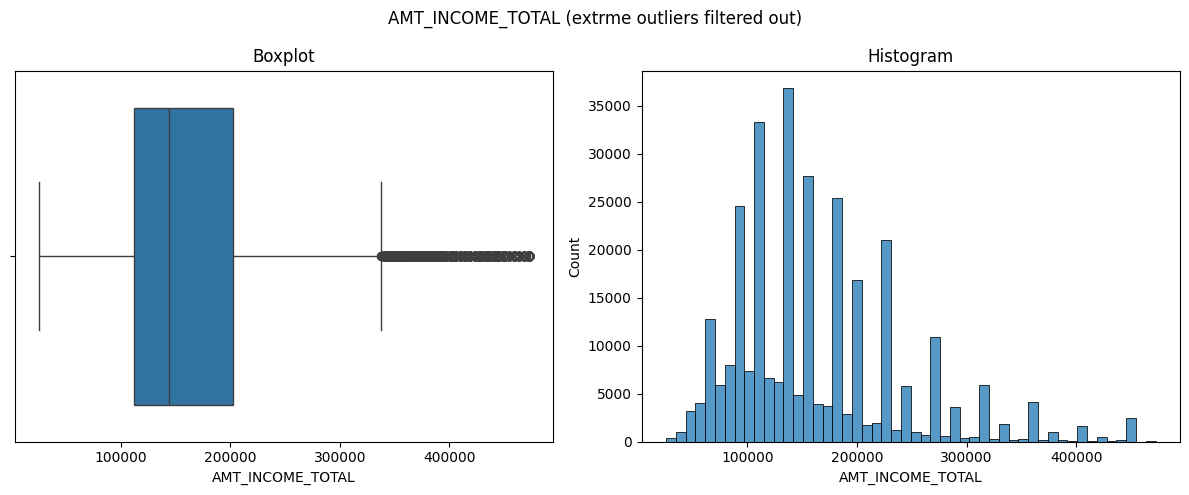

In [124]:
def iqr(column):
    q1, q3 = df[column].quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (3 * IQR)
    upr_bound = q3 + (3 * IQR)
    extreme = df[column][(df[column] >= lwr_bound) & (df[column] <= upr_bound)]
    return extreme

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

extreme = iqr("AMT_INCOME_TOTAL")
sns.boxplot(x=extreme, data=df, ax=axes[0])
axes[0].set_title("Boxplot")

sns.histplot(data=df, x=extreme, bins=50, ax=axes[1])
axes[1].set_title("Histogram")

plt.suptitle("AMT_INCOME_TOTAL (extrme outliers filtered out)")
plt.tight_layout()
plt.show()

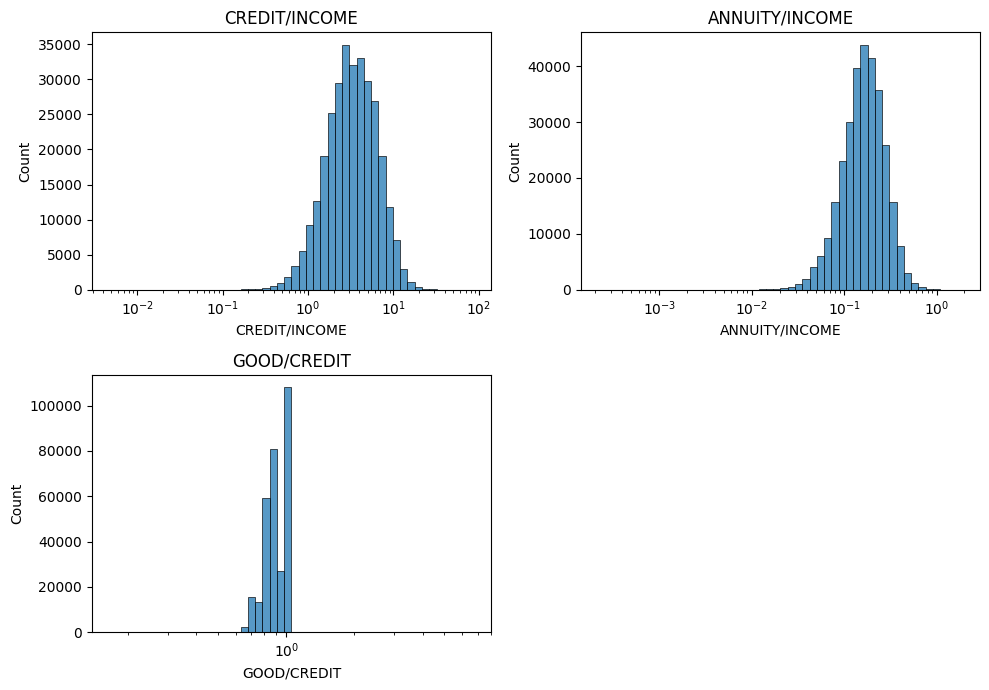

In [102]:
# Define transformations
df['CREDIT/INCOME'] = df['AMT_CREDIT']/df['AMT_INCOME_TOTAL']
df['ANNUITY/INCOME'] = df['AMT_ANNUITY']/df['AMT_INCOME_TOTAL']
df['GOOD/CREDIT'] = df['AMT_GOODS_PRICE']/df['AMT_CREDIT']

cols_to_plot = ['CREDIT/INCOME', 'ANNUITY/INCOME', 'GOOD/CREDIT']

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes= axes.flatten()

for i, column in enumerate(cols_to_plot):
    sns.histplot(data=df, x=df[column], bins=50, ax=axes[i], log_scale=True)
    axes[i].set_title(column)

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## 5. Categorical Feature Distributions and Relationship with Target

In [17]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
len(cat_cols)

16

In [18]:
df[cat_cols].nunique().sort_values(ascending=False).head(20)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

Bad rate and count of features: 

             NAME_EDUCATION_TYPE      mean   count
3                Lower secondary  0.109277    3816
4  Secondary / secondary special  0.089399  218391
2              Incomplete higher  0.084850   10277
1               Higher education  0.053551   74863
0                Academic degree  0.018293     164

       NAME_INCOME_TYPE      mean   count
2       Maternity leave  0.400000       5
6            Unemployed  0.363636      22
7               Working  0.095885  158774
1  Commercial associate  0.074843   71617
4         State servant  0.057550   21703
3             Pensioner  0.053864   55362
0           Businessman  0.000000      10
5               Student  0.000000      18

     NAME_HOUSING_TYPE      mean   count
4     Rented apartment  0.123131    4881
5         With parents  0.116981   14840
2  Municipal apartment  0.085397   11183
0      Co-op apartment  0.079323    1122
1    House / apartment  0.077957  272868
3     Office apartment  0.065724  

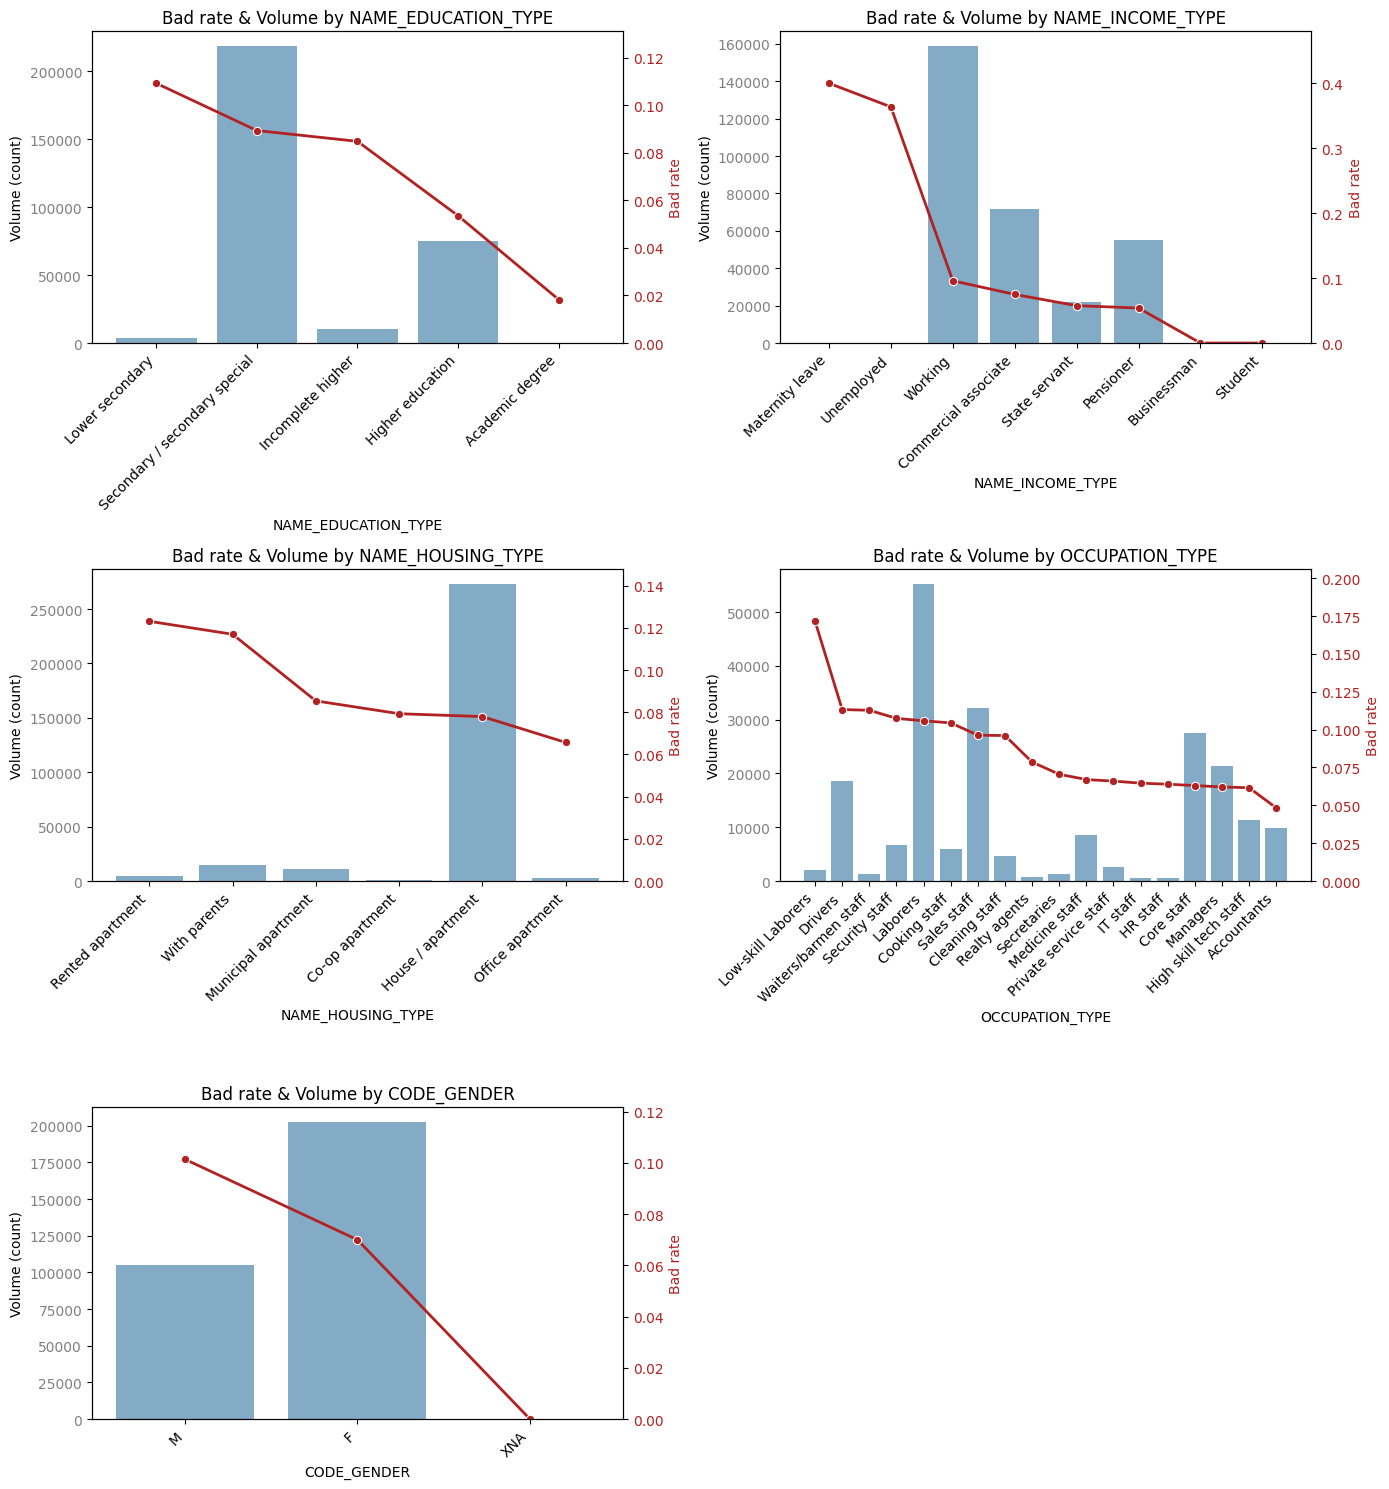

In [85]:
cols = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER']

fig, axes = plt.subplots(3, 2, figsize=(14, 15))

axes = axes.flatten()

print("Bad rate and count of features: \n")

for i, col in enumerate(cols):
    grouped = df.groupby(col)['TARGET'].agg(['mean','count']).reset_index()
    grouped = grouped.sort_values(by='mean', ascending=False)

    print(f"{grouped.head(10)}\n")

    sns.barplot(data=grouped, x=col, y='count', alpha=0.6, ax=axes[i])
    axes[i].set_ylabel("Volume (count)")
    axes[i].tick_params(axis='y', labelcolor='grey')
    axes[i].set_title(f'Bad rate & Volume by {col}')

    axes[i].set_xticklabels(grouped[col], rotation=45, ha='right')

    ax2 = axes[i].twinx()
    sns.lineplot(data=grouped, x=col, y='mean', marker='o', color='firebrick', linewidth=2, ax=ax2)
    ax2.set_ylabel('Bad rate', color='firebrick')
    ax2.tick_params(axis='y', labelcolor='firebrick')

    ax2.set_ylim(0, grouped['mean'].max() * 1.2)
    
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## 6. Numeric Feature-Target Realtionships

Bad rate and count of features:

                             mean  count
AMT_INCOME_TOTAL_bins                   
(25649.99999, 81000.0]   0.081908  33391
(81000.0, 99000.0]       0.082232  30280
(99000.0, 112500.0]      0.087192  36907
(112500.0, 135000.0]     0.084894  48849
(135000.0, 147150.0]     0.090007   4333
(147150.0, 162000.0]     0.086407  31120
(162000.0, 180000.0]     0.084224  30704
(180000.0, 225000.0]     0.078065  44809
(225000.0, 270000.0]     0.070401  19957
(270000.0, 117000000.0]  0.061375  27161

                             mean  count
AMT_CREDIT_bins                         
(44999.99999, 180000.0]  0.067221  33204
(180000.0, 254700.0]     0.077772  31721
(254700.0, 306306.0]     0.082071  27391
(306306.0, 432000.0]     0.100335  30707
(432000.0, 513531.0]     0.095893  30826
(513531.0, 604152.0]     0.105220  30726
(604152.0, 755190.0]     0.085364  34066
(755190.0, 900000.0]     0.070799  29958
(900000.0, 1133748.0]    0.068823  28319
(1133748.0, 4050000.0] 

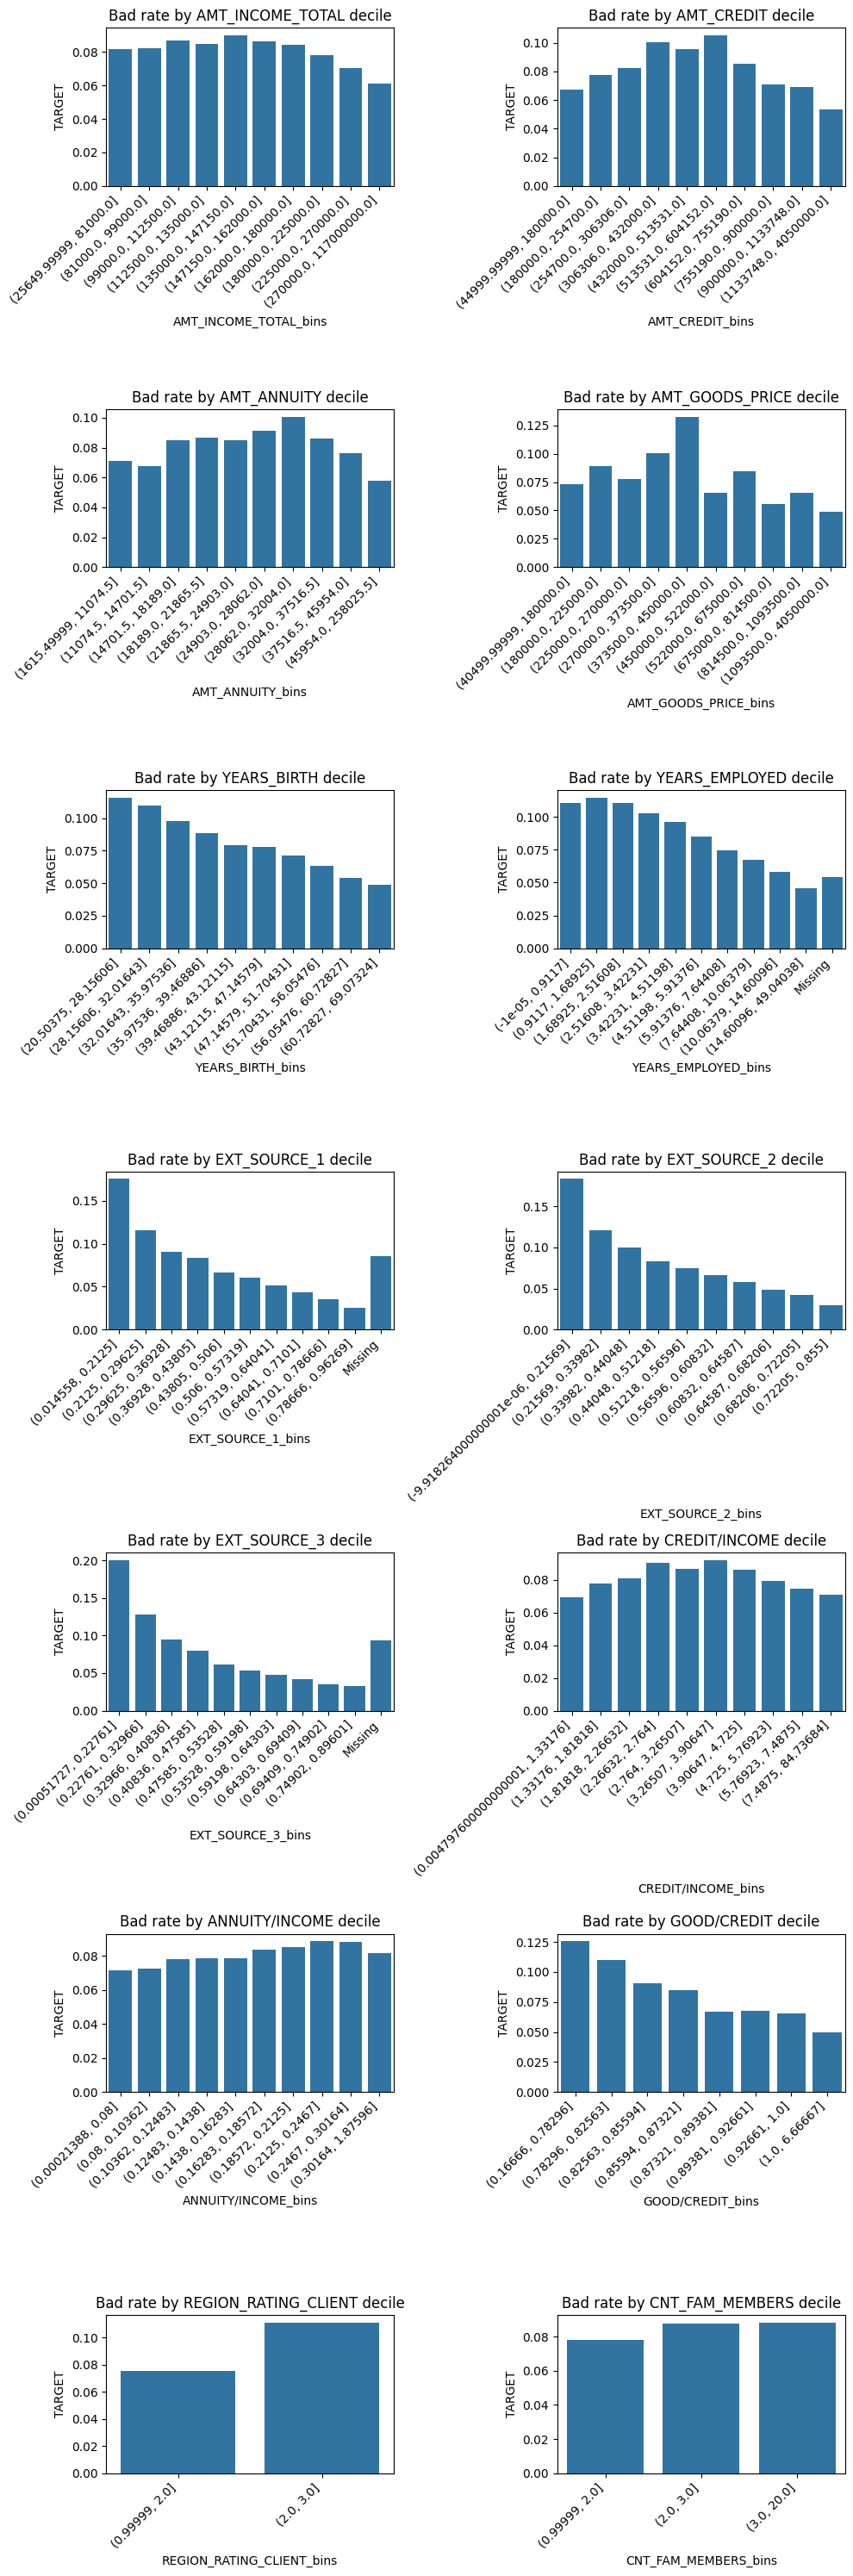

In [108]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
        'YEARS_BIRTH', 'YEARS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
        'CREDIT/INCOME', 'ANNUITY/INCOME', 'GOOD/CREDIT', 'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS']

missingness = ['EXT_SOURCE_1', 'EXT_SOURCE_3', 'YEARS_EMPLOYED']

fig, axes = plt.subplots(7, 2, figsize=(10, 30))
axes = axes.flatten()

print("Bad rate and count of features:\n")
 
for i, col in enumerate(cols):
    # Discretise column into 10 equal-sized decile bins
    df[f'{col}_bins'] = pd.qcut(df[col], 10, duplicates='drop', precision=5)

    # Plot bad rate of missingness of column as a standalone bar
    if col in missingness:
        df[f'{col}_bins'] = df[f'{col}_bins'].cat.add_categories('Missing')
        df[f'{col}_bins'] = df[f'{col}_bins'].fillna('Missing')

    print(f"{df.groupby(f'{col}_bins')["TARGET"].agg(["mean","count"])}\n")

    # Compute bad rate for each decile
    decile_rates = df.groupby(f'{col}_bins')['TARGET'].mean().reset_index()

    sns.barplot(data=decile_rates, x=f'{col}_bins', y='TARGET', ax=axes[i])

    decile_rates[f'{col}_bins'] = decile_rates[f'{col}_bins'].astype(str)
    
    # Formatting
    axes[i].set_title(f"Bad rate by {col} decile")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 7. Feature-Feature Relationships

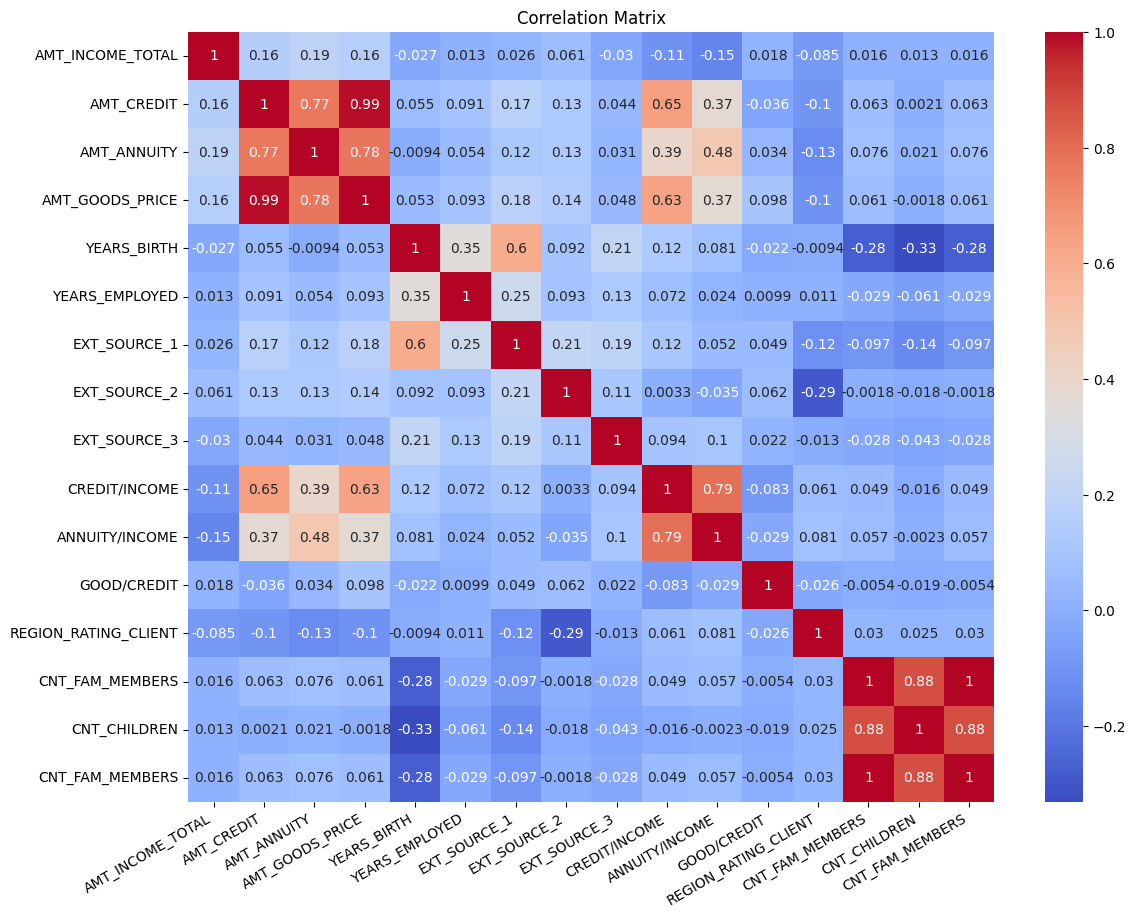

In [98]:
cols_ = cols + ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
plt.figure(figsize=(13, 10))
gf = df[cols_]
sns.heatmap(gf.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.xticks(rotation=30, ha='right')
plt.show()